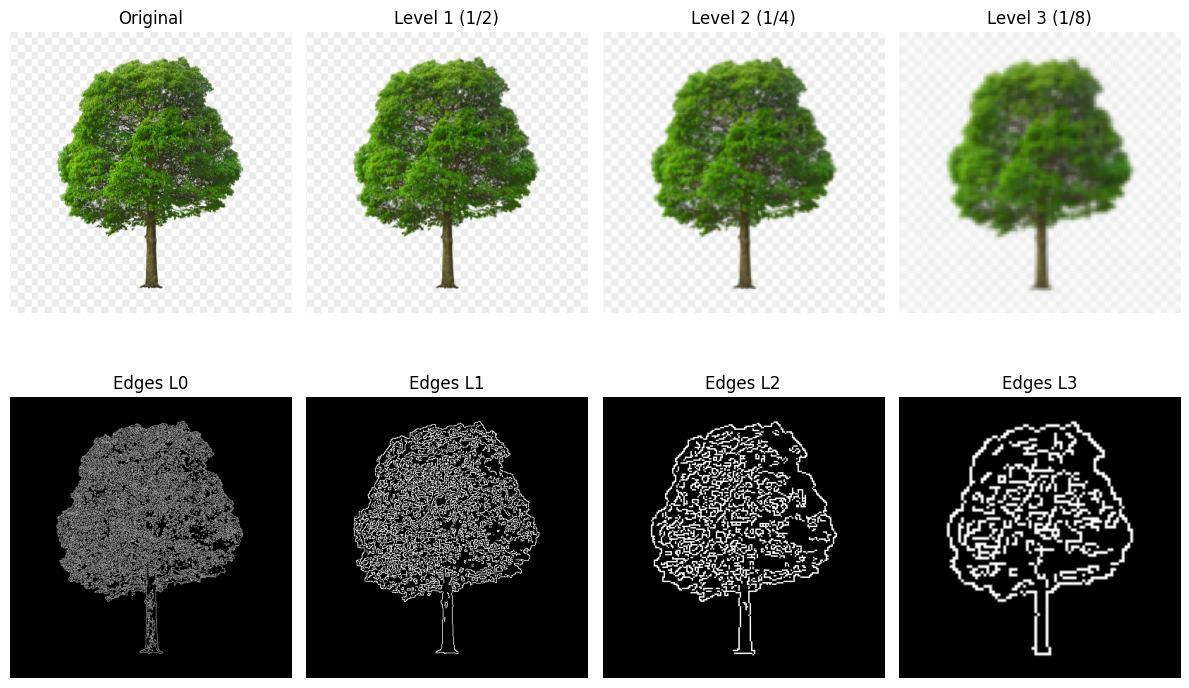

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('tree.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Generate Gaussian Pyramid
level0 = img
level1 = cv2.pyrDown(level0)   # Half size
level2 = cv2.pyrDown(level1)   # Quarter size
level3 = cv2.pyrDown(level2)   # One-eighth size

# Apply Canny Edge Detection
edges0 = cv2.Canny(level0, 100, 200)
edges1 = cv2.Canny(level1, 100, 200)
edges2 = cv2.Canny(level2, 100, 200)
edges3 = cv2.Canny(level3, 100, 200)

# Display Results
titles = ['Original', 'Level 1 (1/2)', 'Level 2 (1/4)', 'Level 3 (1/8)',
          'Edges L0', 'Edges L1', 'Edges L2', 'Edges L3']

images = [level0, level1, level2, level3,
           edges0, edges1, edges2, edges3]

plt.figure(figsize=(12,8))
for i in range(8):
     plt.subplot(2,4,i+1)
     plt.imshow(images[i], cmap='gray')
     plt.title(titles[i])
     plt.axis('off')

plt.tight_layout()
plt.show()


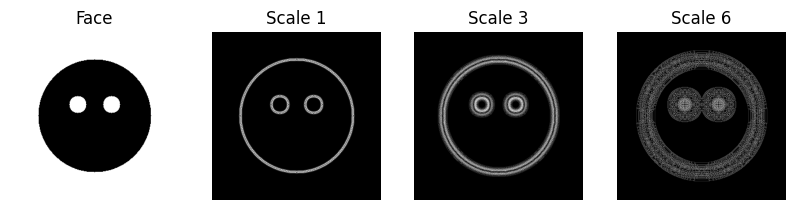

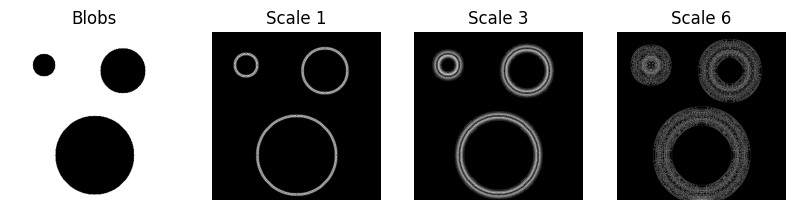

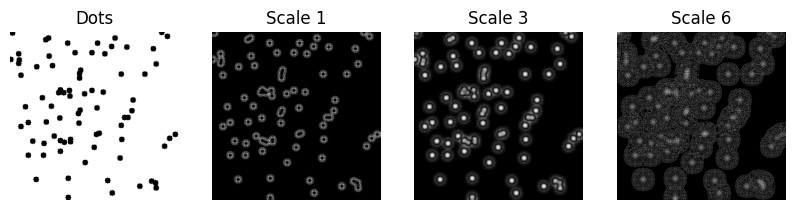

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# OPTION 1: Face Structure
# ===============================
face = np.ones((300, 300), dtype=np.uint8) * 255

# Draw head
cv2.circle(face, (150, 150), 100, 0, -1)

# Draw eyes
cv2.circle(face, (120, 130), 15, 255, -1)
cv2.circle(face, (180, 130), 15, 255, -1)

# Apply LoG at 3 scales
blur1 = cv2.GaussianBlur(face, (0,0), 1)
log1 = cv2.Laplacian(blur1, cv2.CV_64F)

blur2 = cv2.GaussianBlur(face, (0,0), 3)
log2 = cv2.Laplacian(blur2, cv2.CV_64F)

blur3 = cv2.GaussianBlur(face, (0,0), 6)
log3 = cv2.Laplacian(blur3, cv2.CV_64F)

plt.figure(figsize=(10,3))
plt.subplot(1,4,1); plt.imshow(face, cmap='gray'); plt.title("Face"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(np.abs(log1), cmap='gray'); plt.title("Scale 1"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(np.abs(log2), cmap='gray'); plt.title("Scale 3"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(np.abs(log3), cmap='gray'); plt.title("Scale 6"); plt.axis('off')
plt.show()


# ===============================
# OPTION 2: Different Size Circles
# ===============================
blobs = np.ones((300, 300), dtype=np.uint8) * 255

cv2.circle(blobs, (60, 60), 20, 0, -1)
cv2.circle(blobs, (200, 70), 40, 0, -1)
cv2.circle(blobs, (150, 220), 70, 0, -1)

blur1 = cv2.GaussianBlur(blobs, (0,0), 1)
log1 = cv2.Laplacian(blur1, cv2.CV_64F)

blur2 = cv2.GaussianBlur(blobs, (0,0), 3)
log2 = cv2.Laplacian(blur2, cv2.CV_64F)

blur3 = cv2.GaussianBlur(blobs, (0,0), 6)
log3 = cv2.Laplacian(blur3, cv2.CV_64F)

plt.figure(figsize=(10,3))
plt.subplot(1,4,1); plt.imshow(blobs, cmap='gray'); plt.title("Blobs"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(np.abs(log1), cmap='gray'); plt.title("Scale 1"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(np.abs(log2), cmap='gray'); plt.title("Scale 3"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(np.abs(log3), cmap='gray'); plt.title("Scale 6"); plt.axis('off')
plt.show()


# ===============================
# OPTION 3: Small Random Dots
# ===============================
dots = np.ones((300, 300), dtype=np.uint8) * 255

for i in range(80):
    x = np.random.randint(0,300)
    y = np.random.randint(0,300)
    cv2.circle(dots, (x,y), 5, 0, -1)

blur1 = cv2.GaussianBlur(dots, (0,0), 1)
log1 = cv2.Laplacian(blur1, cv2.CV_64F)

blur2 = cv2.GaussianBlur(dots, (0,0), 3)
log2 = cv2.Laplacian(blur2, cv2.CV_64F)

blur3 = cv2.GaussianBlur(dots, (0,0), 6)
log3 = cv2.Laplacian(blur3, cv2.CV_64F)

plt.figure(figsize=(10,3))
plt.subplot(1,4,1); plt.imshow(dots, cmap='gray'); plt.title("Dots"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(np.abs(log1), cmap='gray'); plt.title("Scale 1"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(np.abs(log2), cmap='gray'); plt.title("Scale 3"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(np.abs(log3), cmap='gray'); plt.title("Scale 6"); plt.axis('off')
plt.show()


OpenCV Version: 4.13.0
Total Keypoints Image 1: 125
Total Keypoints Image 2: 125
Good Matches (SIFT): 69


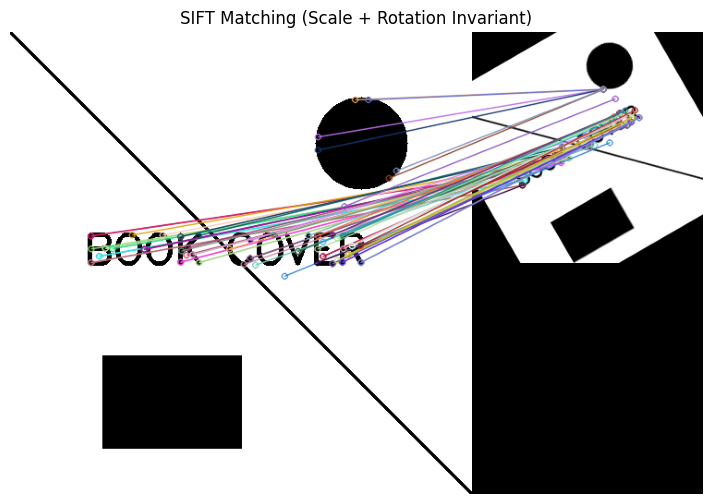

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("OpenCV Version:", cv2.__version__)

# =====================================
# STEP 1: Create Synthetic Textured Image
# =====================================
img1 = np.ones((500, 500), dtype=np.uint8) * 255

# Add texture (text + shapes)
cv2.putText(img1, "BOOK COVER", (80,250),
            cv2.FONT_HERSHEY_SIMPLEX, 1.5, 0, 4)

cv2.circle(img1, (380,120), 50, 0, -1)
cv2.rectangle(img1, (100,350), (250,450), 0, -1)
cv2.line(img1, (0,0), (500,500), 0, 2)

 # =====================================
# STEP 2: Create Smaller + Rotated Image
# =====================================
img2 = cv2.resize(img1, None, fx=0.5, fy=0.5)

center = (img2.shape[1]//2, img2.shape[0]//2)
M = cv2.getRotationMatrix2D(center, 30, 1)
img2 = cv2.warpAffine(img2, M, (img2.shape[1], img2.shape[0]))

# =====================================
# STEP 3: Apply SIFT
# =====================================
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# =====================================
# STEP 4: Match Features
# =====================================
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
         good.append(m)

print("Total Keypoints Image 1:", len(kp1))
print("Total Keypoints Image 2:", len(kp2))
print("Good Matches (SIFT):", len(good))

# =====================================
# STEP 5: Draw Matches
# =====================================
matched_img = cv2.drawMatches(
        img1, kp1,
        img2, kp2,
        good, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
     )

plt.figure(figsize=(12,6))
plt.imshow(matched_img, cmap='gray')
plt.title("SIFT Matching (Scale + Rotation Invariant)")
plt.axis('off')
plt.show()


Resolution 512x512 -> Mean: 133.08, Variance: 5411.65
Resolution 256x256 -> Mean: 133.18, Variance: 1964.77
Resolution 128x128 -> Mean: 133.20, Variance: 1948.77
Resolution 64x64 -> Mean: 132.48, Variance: 2007.25
Resolution 32x32 -> Mean: 132.62, Variance: 1888.29


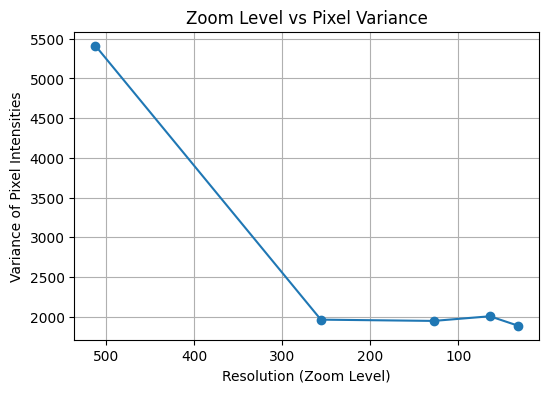

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# STEP 1: Create Synthetic Textured Image
# ======================================
np.random.seed(0)
img = np.random.randint(0, 256, (512, 512), dtype=np.uint8)

# Add some shapes for structure
cv2.circle(img, (256,256), 100, 200, -1)
cv2.rectangle(img, (50,50), (150,150), 50, -1)

# ======================================
# STEP 2: Create Different Resolutions
# ======================================
levels = []
sizes = [512, 256, 128, 64, 32]  # High → Low resolution

for s in sizes:
    resized = cv2.resize(img, (s, s))
    levels.append(resized)

# ======================================
# STEP 3: Flatten + Calculate Mean & Variance
# ======================================
means = []
variances = []

for i, image in enumerate(levels):
      flat = image.flatten()
      means.append(np.mean(flat))
      variances.append(np.var(flat))
      print(f"Resolution {sizes[i]}x{sizes[i]} -> Mean: {means[-1]:.2f}, Variance: {variances[-1]:.2f}")

# ======================================
# STEP 4: Plot Zoom Level vs Variance
# ======================================
plt.figure(figsize=(6,4))
plt.plot(sizes, variances, marker='o')
plt.xlabel("Resolution (Zoom Level)")
plt.ylabel("Variance of Pixel Intensities")
plt.title("Zoom Level vs Pixel Variance")
plt.gca().invert_xaxis()  # High → Low visually
plt.grid(True)
plt.show()
